# Gaussian Mixture Model

Credit to https://towardsdatascience.com/gaussian-mixture-models-implemented-from-scratch-1857e40ea566

- It's a method to cluster data. It assumes that the clusters are different Gaussian distributions with different means and covariances. Whereas methods like K-Means cluster data purely based on distances.

- Expectation

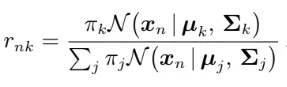

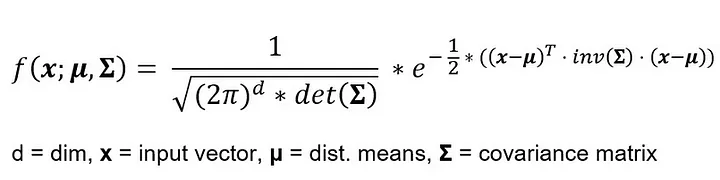

- Maximiation

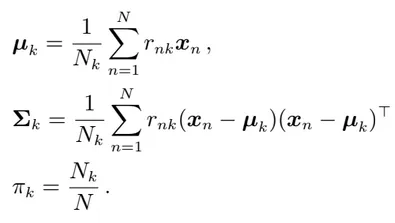

In [104]:
import numpy as np
import matplotlib.pyplot as plt

# Expectation-maximization algorithm
class GMM:
    def __init__(self, n_components, max_iter = 200) -> None:
        self.n_components = n_components
        self.max_iter = max_iter

    def fit(self, X):
        """
        X: (n_samples, n_features)
        """

        # Initialize parameters
        self.X = X
        self.n_samples, self.n_features = self.X.shape
        self.pi = np.ones(self.n_components) / self.n_components
        self.r = np.zeros((self.n_samples, self.n_components))
        self.N = np.zeros(self.n_components)
        self.clusters = np.random.randint(0, self.n_components, self.X.shape[0])
        self.means = [self.X[self.clusters == i].mean(axis=0, keepdims=True) for i in range(self.n_components)]
        self.covs = [np.cov(self.X[self.clusters == i].T) for i in range(self.n_components)]

        for _ in range(self.max_iter):
            self._e_step()
            self._m_step()

    def _e_step(self):
        self.r[:] = 0.0
        for i in range(self.n_components):
            self.r[:, i] = self.pi[i] * self._gaussian_pdf(self.X, self.means[i], self.covs[i])

        self.r /= self.r.sum(axis=1, keepdims=True)

    def _gaussian_pdf(self, X, mean, cov):
        return 1 / np.sqrt((2 * np.pi) ** self.n_components * np.linalg.det(cov)) * np.exp(-0.5 * ((X - mean) @ np.linalg.inv(cov) * (X - mean)).sum(axis=1))

    def _m_step(self):
        self.pi[:] = self.r.mean(axis=0, keepdims=True)
        self.N[:] = self.r.sum(axis=0, keepdims=True)

        for i in range(self.n_components):
            self.means[i] = (self.r[:, i] @ self.X) / self.N[i]
            self.covs[i] = (self.r[:, i] * (self.X - self.means[i]).T @ (self.X - self.means[i])) / self.N[i]

    def predict(self, X):
        r = np.zeros((X.shape[0], self.n_components))
        for i in range(self.n_components):
            r[:, i] = self.pi[i] * self._gaussian_pdf(X, self.means[i], self.covs[i])

        return r.argmax(axis=1)



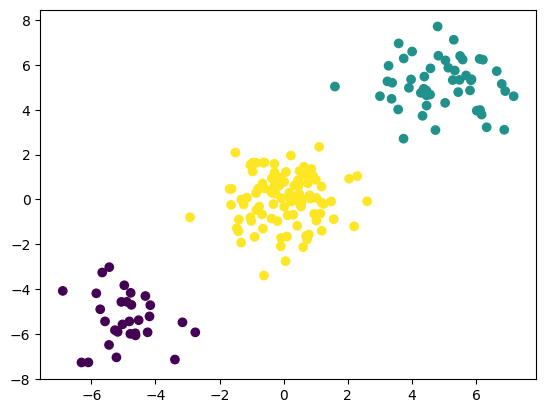

In [110]:
X1 = np.random.normal(loc=0, scale=1, size=(100, 2))
X2 = np.random.normal(loc=5, scale=1, size=(50, 2))
X3 = np.random.normal(loc=-5, scale=1, size=(30, 2))
X = np.vstack([X1, X2, X3])

gmm = GMM(n_components=3, max_iter=200)
gmm.fit(X)

plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=gmm.predict(X))

# Compact

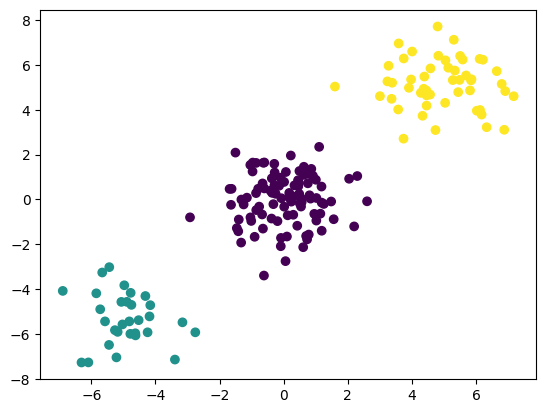

In [111]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3)
gmm.fit(X)

plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=gmm.predict(X))